<a href="https://colab.research.google.com/github/kommineni651/Data_science/blob/main/Forecasting_Data_Driven_Models_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


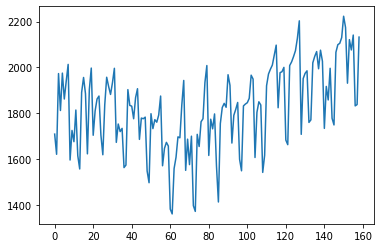

In [2]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

# Splitting data

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)
Train

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0


# Moving Average 

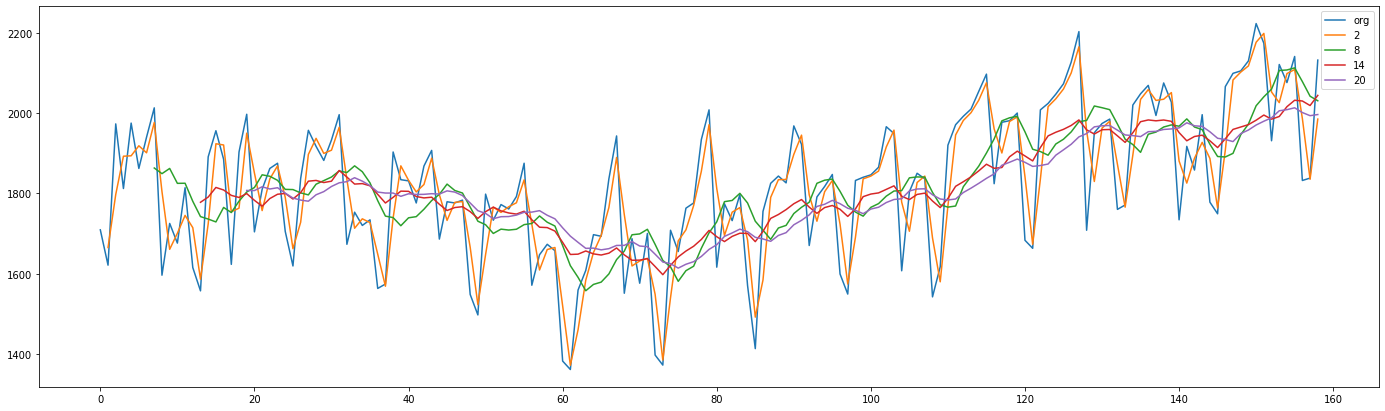

In [4]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


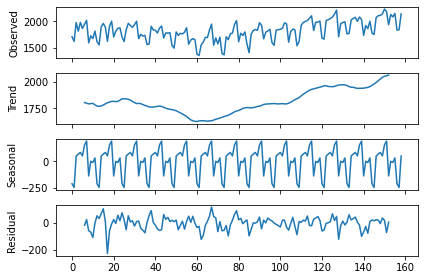

In [5]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq= 12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


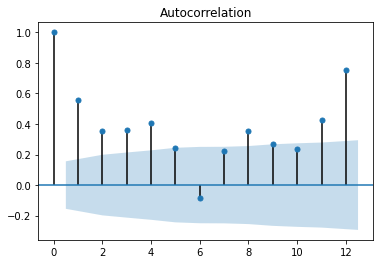

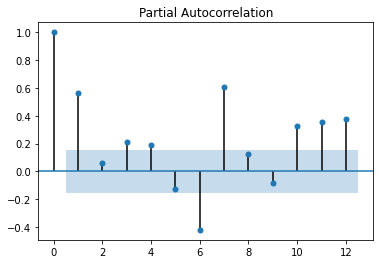

In [6]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [7]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [8]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 


8.490637057828362

### Holt method 

In [9]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [10]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.159669764222986

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

## Final Model by combining train and test

In [11]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [12]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2156.789567
160    2188.299546
161    2147.097980
162    2263.990169
163    2305.817195
164    1932.061970
165    2098.495872
166    2084.574705
167    2136.439741
168    1857.566130
dtype: float64